# Laboratorium 6 - Faktoryzacja Macierzy Nieujemnych

Celem laboratorium było zapoznanie się z Faktoryzacją Macierzy Nieujmenych.

### Zadanie 1

Należało zaimplementować algorytm nieujemnej faktoryzacji macierzy

$$V = WH$$

gdzie $W$ to macierz cech, $H$ macierze współczynników. 

Kroki algorytmu są następujące:

1. Inicjalizacja macierzy $W$ (macierz cech) i $H$ (macierze współczynników) elementami nieujemnymi
2. Aktualizacja wartości według wzoru:

$$\mathbf{H}_{[i, j]}^{n+1} \leftarrow \mathbf{H}_{[i, j]}^{n} \frac{\left(\left(\mathbf{W}^{n}\right)^{T} \mathbf{V}\right)_{[i, j]}}{\left(\left(\mathbf{W}^{n}\right)^{T} \mathbf{W}^{n} \mathbf{H}^{n}\right)_{[i, j]}}$$

$$\mathbf{W}_{[i, j]}^{n+1} \leftarrow \mathbf{W}_{[i, j]}^{n} \frac{\left(\mathbf{V}\left(\mathbf{H}^{n+1}\right)^{T}\right)_{[i, j]}}{\left(\mathbf{W}^{n} \mathbf{H}^{n+1}\left(\mathbf{H}^{n+1}\right)^{T}\right)_{[i, j]}}$$

3. Obliczeń dokonuje się do momentu gdy macierze są stabilne.

In [1]:
class NMF:
    def __init__(self, n_components, max_iter, epsilon=0.0001):
        self.V = None  # dane wejściowe
        self.W = None  # macierz cech
        self.H = None  # macierz współczynników
        self.n_components = n_components
        self.max_iter = max_iter
        self.epsilon = epsilon
        
    def fit(self, X):
        self.V = X.copy()
        # Inicjalizacja macierzy
        self.W = X[:, 0:self.n_components]
        self.H = np.random.rand(self.n_components, X.shape[1])
        epsilon_H = np.ones(self.H.shape) * self.epsilon
        epsilon_W = np.ones(self.W.shape) * self.epsilon
        
        for it in range(0, self.max_iter):
            # Aktualizacja wartości
            H_update = self.H * ((np.dot(self.W.T, self.V)) / (np.dot(np.dot(self.W.T, self.W), self.H)))
            W_update = self.W * ((np.dot(self.V, H_update.T)) / (np.dot(np.dot(self.W, H_update), H_update.T)))
            
            # Porównanie stabilności macierzy
            comparison_H = abs(self.H - H_update) <= epsilon_H
            comparison_W = abs(self.W - W_update) <= epsilon_W
            
            # Jezeli macierze są stabilne
            if comparison_H.all() and comparison_W.all():
                print(it, ' iteracja')
                self.H = H_update.copy()
                self.W = W_update.copy()
                break
            self.H = H_update.copy()
            self.W = W_update.copy()
        return self.W, self.H

## Zadanie 2

Użyć algorytmu NMF do wyświetlania zbioru Irys na wykresie 2D. Na podobnej zasadzie jak przy użyciu algorytmu PCA.

In [2]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
n_c = 2
ep = 0.0001

786  iteracja


Text(0.5, 1.0, 'Własna implementacja NMF')

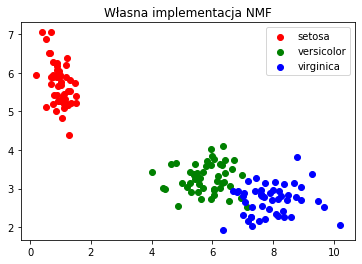

In [4]:
import matplotlib.pyplot as plt

nmf = NMF(n_components=n_c, max_iter=5000, epsilon=0.0001)
W, H = nmf.fit(X=X)

for color, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(W[y==i,0], W[y==i,1], c=color, label=target_name)
    plt.legend()
plt.title('Własna implementacja NMF')

## Zadanie 3

Porównać na wykresie otrzymane wyniki z wynikami otrzymanymi za pomocą algorytmu PCA oraz wbudowanego algorytmy NMF (`sklearn.decomposition.NMF`)

### Wbudowane NMF `sklearn`

Text(0.5, 1.0, 'Implementacja sklearn NMF')

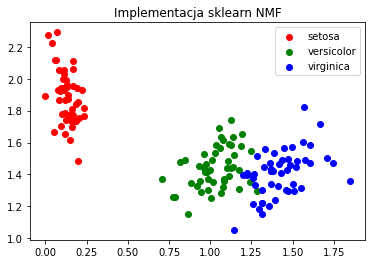

In [4]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=n_c, init='random', random_state=2, max_iter=5000)
W = nmf.fit_transform(X)
H = nmf.components_
for color, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(W[y==i,0], W[y==i,1], c=color, label=target_name)
    plt.legend()
plt.title('Implementacja sklearn NMF')

### PCA

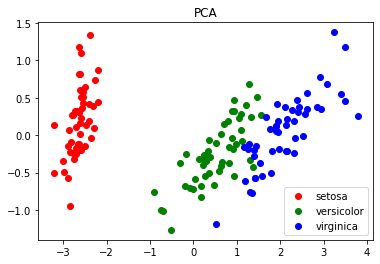

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_c)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_reduced[y==i,0], X_reduced[y==i,1], c=color, label=target_name)
    plt.legend()
plt.title('PCA')
plt.show()

## Podsumowanie

Zaimplementowano algorytm nieujemnej faktoryzacji macierzy oraz przeprowadzono porównanie redukcji wymiarowości przy użyciu własnej implementacji NFM, implementacji z biblioteki `sklearn` oraz z metodą PCA.

Różnice pomiędzy implementacjami NMF są widoczne. Przede wszystkim występują różnice w skalach (rozciągnięcie wykresów). Obie implementacje dają zadowalające wyniki z wyróżnionymi klasami.
